### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación por tiendas



In [8]:

ventaTienda1 = sum(tienda["Precio"])
ventaTienda2 = sum(tienda2["Precio"])
ventaTienda3 = sum(tienda3["Precio"])
ventaTienda4 = sum(tienda4["Precio"])


print(f"La venta total de la tienda 1 fue de: {ventaTienda1:,.0f}")
print(f"La venta total de la tienda 2 fue de: {ventaTienda2:,.0f}")
print(f"La venta total de la tienda 3 fue de: {ventaTienda3:,.0f}")
print(f"La venta total de la tienda 4 fue de: {ventaTienda4:,.0f}")

La venta total de la tienda 1 fue de: 1,150,880,400
La venta total de la tienda 2 fue de: 1,116,343,500
La venta total de la tienda 3 fue de: 1,098,019,600
La venta total de la tienda 4 fue de: 1,038,375,700


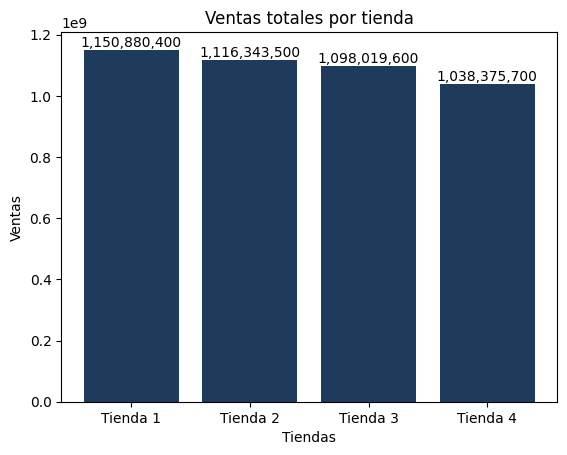

In [16]:
import matplotlib.pyplot as plt
import numpy as np

ventasTiendas = {
    'Tienda 1':ventaTienda1,
    'Tienda 2':ventaTienda2,
    'Tienda 3':ventaTienda3,
    'Tienda 4':ventaTienda4
    }

keys = list(ventasTiendas.keys())
values = list(ventasTiendas.values())

bars = plt.bar(keys,values, color = '#1f3b5c')

plt.xlabel("Tiendas")
plt.ylabel("Ventas")
plt.title("Ventas totales por tienda")

for i,valor in enumerate(ventasTiendas.values()):
    plt.text(i, valor, f"{valor:,.0f}", ha='center', va='bottom')




# 2. Ventas por categoría

In [26]:
ventasPorCategoria = {}

for nombre, df in {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}.items():
    conteo = df['Categoría del Producto'].value_counts()
    ventasPorCategoria[nombre]=conteo

conteo_tienda1 = tienda['Categoría del Producto'].value_counts()
conteo_tienda2 = tienda2['Categoría del Producto'].value_counts()
conteo_tienda3 = tienda3['Categoría del Producto'].value_counts()
conteo_tienda4 = tienda4['Categoría del Producto'].value_counts()

ventas_por_categoria = pd.DataFrame({
    'Tienda 1':conteo_tienda1,
    'Tienda 2': conteo_tienda2,
    'Tienda 3': conteo_tienda3,
    'Tienda 4': conteo_tienda4
}).fillna(0).astype(int)      # Rellenar con NaN para valores 0 y convertir a int

display(ventas_por_categoria)

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


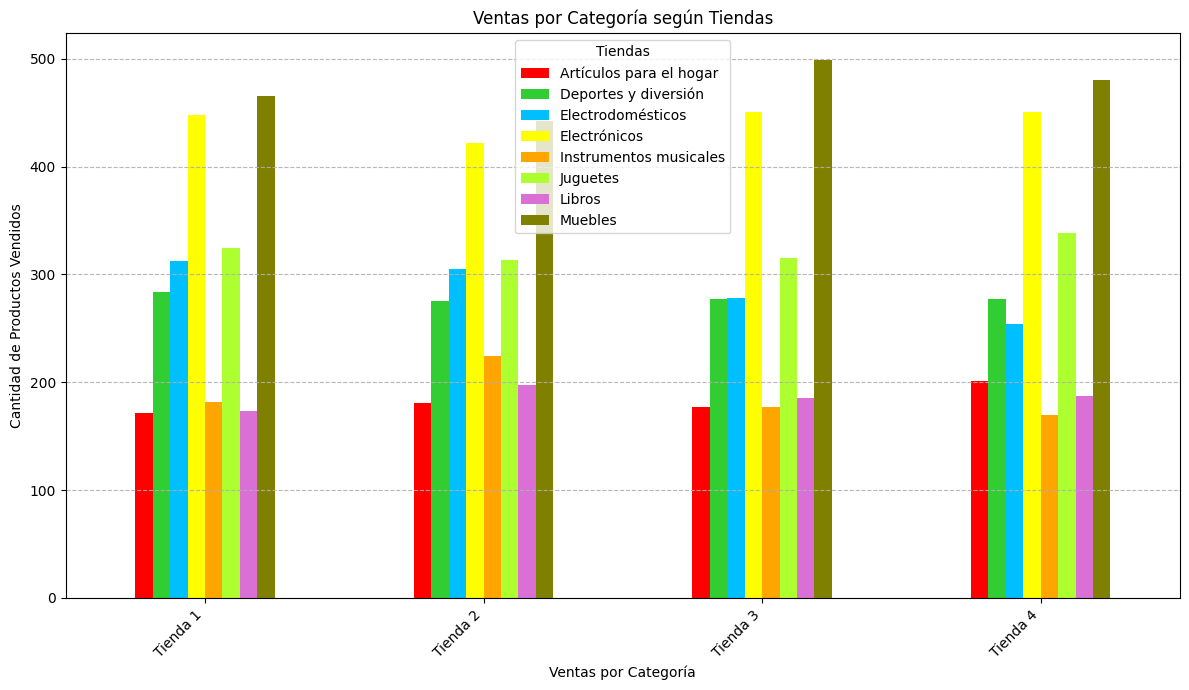

In [33]:
colores = ['#FF0000','#32CD32','#00BFFF','#FFFF00','#FFA500','#ADFF2F','#DA70D6','#808000'] 
ventas_por_categoria.plot(kind='bar', figsize=(12, 7),color = colores)

plt.title('Ventas por Categoría según Tiendas')
plt.xlabel('Ventas por Categoría')

plt.xticks(rotation=45, ha= 'right')  

plt.ylabel('Cantidad de Productos Vendidos')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


           Vendedor  Suma de Precios  Calificación Promedio
3     Felipe Santos      353796000.0                   4.08
4   Izabela de León      350342400.0                   3.86
8     Maria Alfonso      349694800.0                   3.96
6     Juliana Costa      338364700.0                   3.92
10      Pedro Gomez      313350900.0                   4.04
11    Rafael Acosta      310292300.0                   4.06
5    Juan Fernandez      308562100.0                   4.03
7     Lucas Olivera      305403600.0                   3.96
2     Camila Rivera      303184200.0                   4.03
0   Beatriz Morales      302695600.0                   4.05
1    Blanca Ramirez      299586600.0                   3.99
12   Santiago Silva      293418200.0                   4.03
13  Ángel Rodriguez      291625200.0                   4.13
9   Mariana Herrera      283302600.0                   4.07


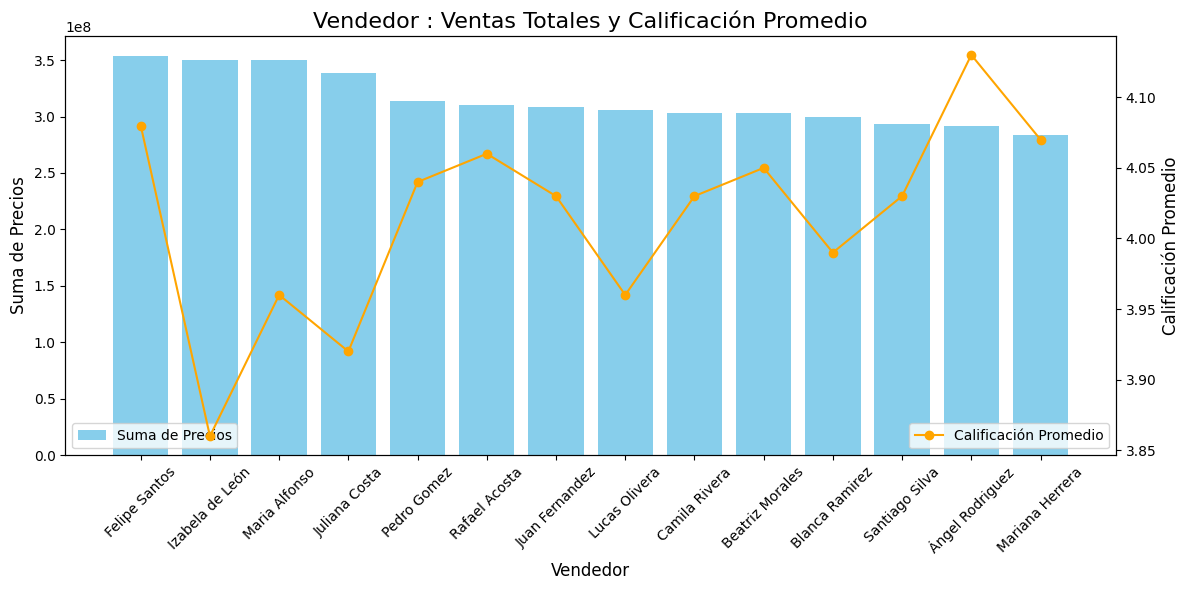

In [42]:
# Concatenar los datos de todas las tiendas
datos = pd.concat([tienda, tienda2, tienda3, tienda4])

# Asegurarse de que la columna 'calificacion' sea de tipo float
datos['Calificación'] = datos['Calificación'].astype(float).round(2)

# Agrupar por vendedor y calcular la suma de precios y calificación promedio
ventas_por_vendedor = datos.groupby('Vendedor', as_index=False).agg({
    'Precio': 'sum',  # Asegúrate de que la columna se llame 'Precio'
    'Calificación': 'mean'  # Asegúrate de que la columna se llame 'Calificación'
})

# Renombrar las columnas
ventas_por_vendedor.rename(columns={
    'Precio': 'Suma de Precios',
    'Calificación': 'Calificación Promedio'
}, inplace=True)

# Redondear la columna 'Calificación Promedio' a 2 decimales
ventas_por_vendedor['Calificación Promedio'] = ventas_por_vendedor['Calificación Promedio'].round(2)

# Ordenar de mayor a menor por la suma de precios
ventas_por_vendedor = ventas_por_vendedor.sort_values(by='Suma de Precios', ascending=False)

# Mostrar el DataFrame
print(ventas_por_vendedor)

# Crear un gráfico de barras con dos colores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para la suma de precios
ax1.bar(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Suma de Precios'], color='skyblue', label='Suma de Precios')
ax1.set_ylabel('Suma de Precios', fontsize=12)
ax1.set_xlabel('Vendedor', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='lower left')

# Crear un segundo eje Y para las calificaciones promedio
ax2 = ax1.twinx()
ax2.plot(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Calificación Promedio'], color='orange', marker='o', label='Calificación Promedio')
ax2.set_ylabel('Calificación Promedio', fontsize=12)
ax2.legend(loc='lower right')

# Título del gráfico
plt.title('Vendedor : Ventas Totales y Calificación Promedio', fontsize=16)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 4. Productos más y menos vendidos

           Vendedor  Suma de Precios  Calificación Promedio
3     Felipe Santos      353796000.0                   4.08
4   Izabela de León      350342400.0                   3.86
8     Maria Alfonso      349694800.0                   3.96
6     Juliana Costa      338364700.0                   3.92
10      Pedro Gomez      313350900.0                   4.04
11    Rafael Acosta      310292300.0                   4.06
5    Juan Fernandez      308562100.0                   4.03
7     Lucas Olivera      305403600.0                   3.96
2     Camila Rivera      303184200.0                   4.03
0   Beatriz Morales      302695600.0                   4.05
1    Blanca Ramirez      299586600.0                   3.99
12   Santiago Silva      293418200.0                   4.03
13  Ángel Rodriguez      291625200.0                   4.13
9   Mariana Herrera      283302600.0                   4.07


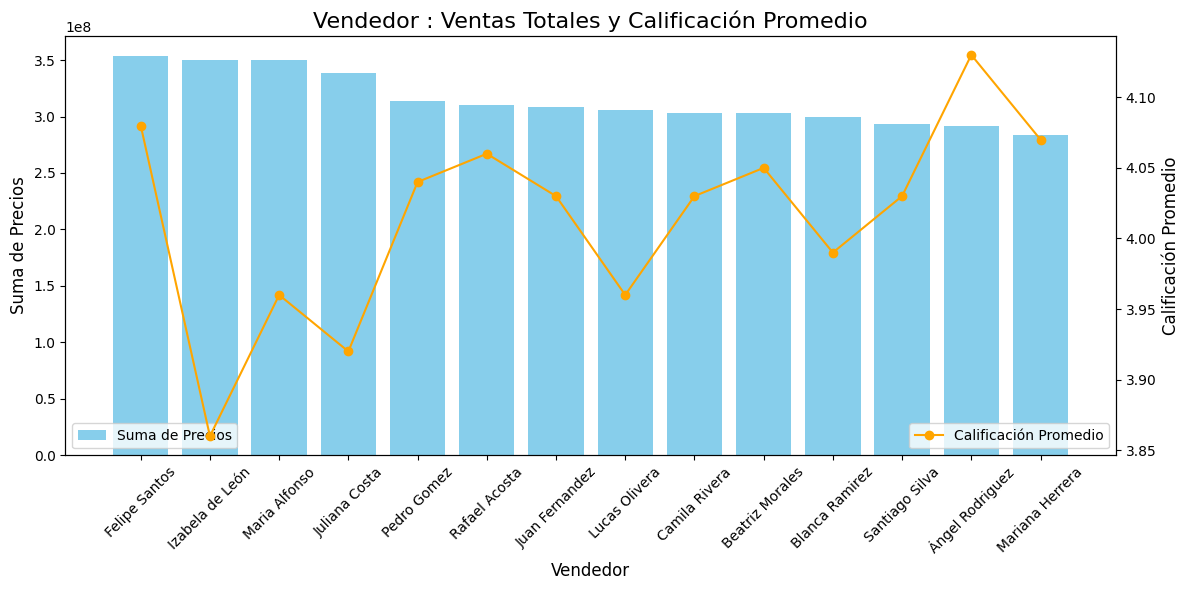

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Concatenar los datos de todas las tiendas
datos = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Asegurarse de que la columna 'calificacion' sea de tipo float
datos['Calificación'] = datos['Calificación'].astype(float).round(2)

# Agrupar por vendedor y calcular la suma de precios y calificación promedio
ventas_por_vendedor = datos.groupby('Vendedor', as_index=False).agg({
    'Precio': 'sum',  # Asegúrate de que la columna se llame 'Precio'
    'Calificación': 'mean'  # Asegúrate de que la columna se llame 'Calificación'
})

# Renombrar las columnas
ventas_por_vendedor.rename(columns={
    'Precio': 'Suma de Precios',
    'Calificación': 'Calificación Promedio'
}, inplace=True)

# Redondear la columna 'Calificación Promedio' a 2 decimales
ventas_por_vendedor['Calificación Promedio'] = ventas_por_vendedor['Calificación Promedio'].round(2)

# Ordenar de mayor a menor por la suma de precios
ventas_por_vendedor = ventas_por_vendedor.sort_values(by='Suma de Precios', ascending=False)

# Mostrar el DataFrame
print(ventas_por_vendedor)

# Crear un gráfico de barras con dos colores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para la suma de precios
ax1.bar(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Suma de Precios'], color='skyblue', label='Suma de Precios')
ax1.set_ylabel('Suma de Precios', fontsize=12)
ax1.set_xlabel('Vendedor', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='lower left')

# Crear un segundo eje Y para las calificaciones promedio
ax2 = ax1.twinx()
ax2.plot(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Calificación Promedio'], color='orange', marker='o', label='Calificación Promedio')
ax2.set_ylabel('Calificación Promedio', fontsize=12)
ax2.legend(loc='lower right')

# Título del gráfico
plt.title('Vendedor : Ventas Totales y Calificación Promedio', fontsize=16)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 5. Envío promedio por tienda

In [40]:
# Función para calcular el promedio de envíos por tienda
def calcular_envio_promedio(df, nombre_tienda):
    promedio_envio = df['Costo de envío'].mean()  # Asumiendo que la columna de envíos se llama 'Costo de envío'
    return {
        'Tienda': nombre_tienda,
        'Promedio de envío': promedio_envio
    }

# Calcular para cada tienda
resultados_envios = [
    calcular_envio_promedio(tienda, 'Tienda 1'),
    calcular_envio_promedio(tienda2, 'Tienda 2'),
    calcular_envio_promedio(tienda3, 'Tienda 3'),
    calcular_envio_promedio(tienda4, 'Tienda 4')
]

# Crear un DataFrame con los resultados de envíos
df_envios = pd.DataFrame(resultados_envios)
df_envios = df_envios.round(4)

# Aplicar estilos
df_envios_styled = df_envios.style.set_properties(
    **{'text-align': 'left'}, subset=['Tienda']
).set_properties(
    **{'text-align': 'right'}, subset=['Promedio de envío']
)

# Mostrar el DataFrame con estilos
df_envios_styled

# Mostrar el DataFrame sin índice
#df_envios.to_string(index=False)

,Tienda,Promedio de envío
0,Tienda 1,26018.609600
1,Tienda 2,25216.235700
2,Tienda 3,24805.680400
3,Tienda 4,23459.457200
